In [1]:
import pandas as pd
import numpy as np

In [2]:
df_diab = pd.read_csv('diabetes.csv')

In [3]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df_diab.shape

(768, 9)

In [6]:
X = df_diab.drop(['Outcome'],axis=1)
y = df_diab[['Outcome']]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=12345)

In [9]:
X_train.shape

(614, 8)

In [10]:
X_test.shape

(154, 8)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from tensorflow.keras.layers import Dense, Dropout

In [20]:
df_diab.shape[1]

9

In [40]:
model = Sequential()

In [41]:
model.add(Dense(units=128,
                activation='relu',
                input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.20))

In [42]:
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               1152      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)               

In [44]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               1152      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)               

In [46]:
result = model.fit(X_train_scaled, 
                   y_train, 
                   epochs=100, 
                   verbose=1, 
                   batch_size = 32)

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.4609
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6743
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.6954
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.7508
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7704
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7622
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.7704
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7752
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7720
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.7752
Epoch 11/

In [47]:
score = model.evaluate(X_test_scaled, y_test, verbose=0)

In [48]:
score

[0.6519757509231567, 0.7532467246055603]

In [49]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [51]:
confusion_matrix(y_pred=y_train_pred > 0.5, 
                 y_true = y_train)

array([[376,  18],
       [ 37, 183]])

In [52]:
accuracy_score(y_pred=y_train_pred > 0.5, 
               y_true = y_train)

0.9104234527687296

In [53]:
confusion_matrix(y_pred=y_test_pred > 0.5, 
                 y_true = y_test)

array([[90, 16],
       [22, 26]])

In [54]:
accuracy_score(y_pred=y_test_pred > 0.5, 
               y_true = y_test)

0.7532467532467533

In [56]:
history = pd.DataFrame(result.history)

In [57]:
history.head()

,loss,accuracy
0,0.704467,0.460912
1,0.667599,0.674267
2,0.616848,0.695440
3,0.540314,0.750814
4,0.498686,0.770358


In [58]:
import matplotlib.pyplot as plt

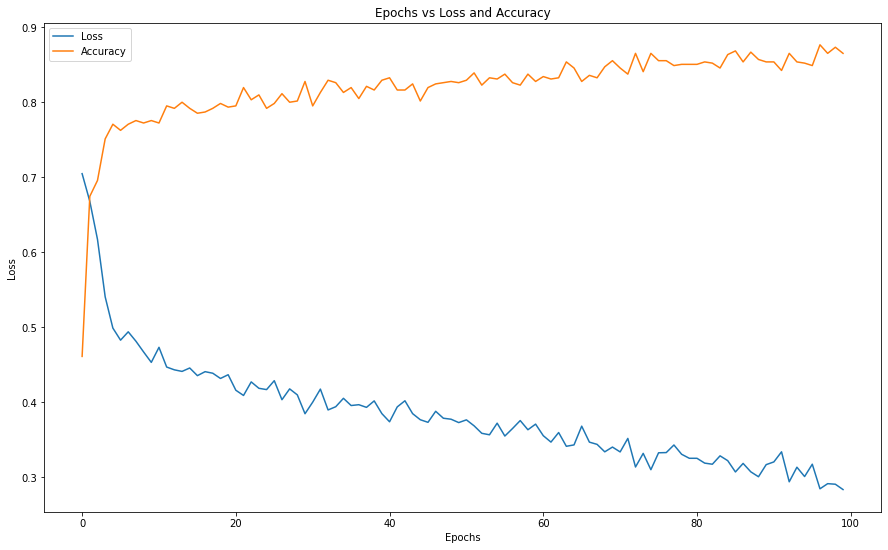

In [59]:
plt.figure(figsize = (15,9))
plt.plot(history.loss, label='Loss')
plt.plot(history.accuracy, label='Accuracy')
plt.title('Epochs vs Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()